# mnist digit classification 


In [19]:
from keras.datasets import mnist 

In [20]:
(X_train , y_train),(X_test, y_test) = mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train[0].shape

(28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

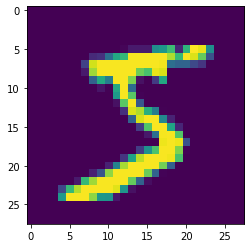

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

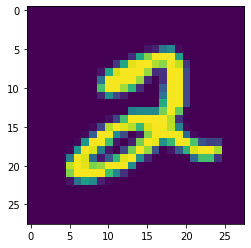

In [25]:
plt.imshow(X_train[5])

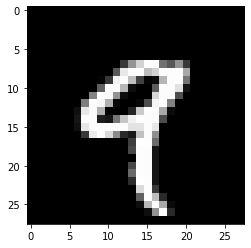

In [26]:
plt.imshow(X_train[4],cmap='gray')

In [27]:
X_train[0].shape

(28, 28)

In [28]:
# reshape the XX_train& X_test - 60000,28,28,1
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [29]:
X_train[0].shape

(28, 28, 1)

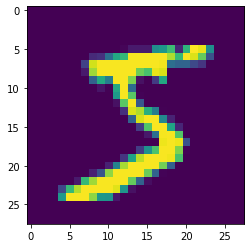

In [30]:
plt.imshow(X_train[0])

In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
#did one hot encoding therefore there will be 10 columns for each category 

In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [34]:
#flatten in n -- converts into 1D 

In [41]:
model = Sequential()
#CNN first layer
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#ANN

model.add(Flatten())
model.add(Dense(1000,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
y_test=to_categorical(y_test)

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3201 - accuracy: 0.9488 - val_loss: 0.0931 - val_accuracy: 0.9730
Epoch 2/3
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0711 - val_accuracy: 0.9798
Epoch 3/3
1875/1875 [==============================] - 10890s 6s/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0566 - val_accuracy: 0.9838


In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0566 - accuracy: 0.9838


[0.056563641875982285, 0.9837999939918518]

# Cats and Dogs

# directory structure 

In [46]:
# import 

In [52]:
import matplotlib.pyplot as plt 
from matplotlib.image import imread 

folder = 'C:/Users/lenovo/OneDrive/Desktop/simplillearn directory/course/deep learning/projects/Lesson 6-Convolutional Neural Net/dataset (1)/dataset/training_set/cats/'

<function matplotlib.pyplot.show(close=None, block=None)>

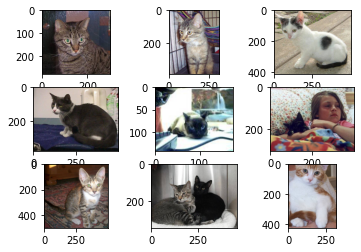

In [53]:
for i in range(9):
    plt.subplot(330+1+i)
    filename=folder+'cat.'+str(i+1)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

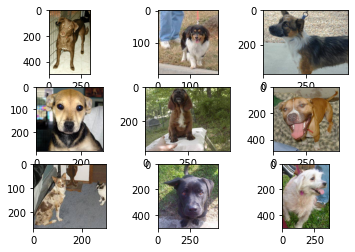

In [56]:
folder1='C:/Users/lenovo/OneDrive/Desktop/simplillearn directory/course/deep learning/projects/Lesson 6-Convolutional Neural Net/dataset (1)/dataset/training_set/dogs/'
for i in range(9):
    plt.subplot(330+1+i)
    filename=folder1+'dog.'+str(i+1)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
    
plt.show

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
 train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [59]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot



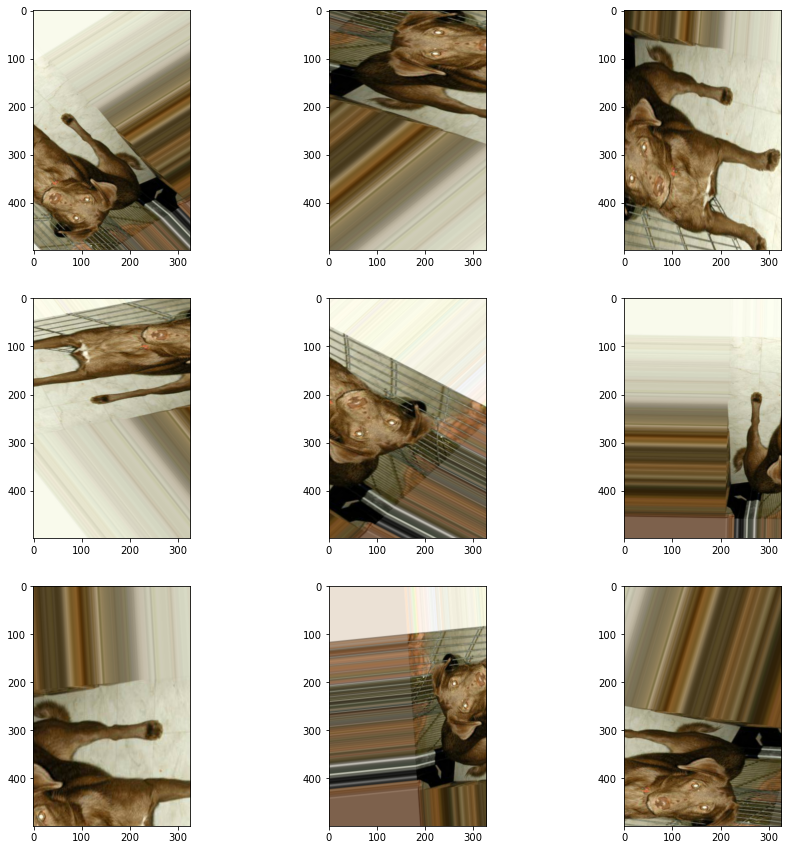

In [61]:
plt.figure(figsize=(15,15))
# load the image
img = load_img('C:/Users/lenovo/OneDrive/Desktop/simplillearn directory/course/deep learning/projects/Lesson 6-Convolutional Neural Net/dataset (1)/dataset/training_set/dogs/dog.1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True,vertical_flip=True,rotation_range=90,height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()



# creating training set and test set

In [63]:
training_set=train_datagen.flow_from_directory('C:/Users/lenovo/OneDrive/Desktop/simplillearn directory/course/deep learning/projects/Lesson 6-Convolutional Neural Net/dataset (1)/dataset/training_set/',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
                                            
#traindatagen is obnjet of imagedataGenerator


Found 8000 images belonging to 2 classes.


In [64]:
test_set=test_datagen.flow_from_directory('C:/Users/lenovo/OneDrive/Desktop/simplillearn directory/course/deep learning/projects/Lesson 6-Convolutional Neural Net/dataset (1)/dataset/test_set/',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
                                            



Found 2000 images belonging to 2 classes.


In [65]:
# executing the model ------ batch .

In [66]:
from tensorflow.keras.layers import Dropout

In [69]:
# CNN Architecture
model=Sequential()
# First CNN Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Second CNN Layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ANN
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(1,activation='sigmoid'))



In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)       

In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 223s 886ms/step - loss: 0.6833 - accuracy: 0.5545 - val_loss: 0.6483 - val_accuracy: 0.6030
Epoch 2/10
250/250 [==============================] - 97s 388ms/step - loss: 0.6132 - accuracy: 0.6603 - val_loss: 0.6042 - val_accuracy: 0.6690
Epoch 3/10
250/250 [==============================] - 103s 412ms/step - loss: 0.5860 - accuracy: 0.6933 - val_loss: 0.5549 - val_accuracy: 0.7295
Epoch 4/10
250/250 [==============================] - 110s 439ms/step - loss: 0.5623 - accuracy: 0.7049 - val_loss: 0.5259 - val_accuracy: 0.7390
Epoch 5/10
250/250 [==============================] - 108s 433ms/step - loss: 0.5388 - accuracy: 0.7253 - val_loss: 0.5062 - val_accuracy: 0.7550
Epoch 6/10
250/250 [==============================] - 109s 437ms/step - loss: 0.5212 - accuracy: 0.7402 - val_loss: 0.5445 - val_accuracy: 0.7305
Epoch 7/10
250/250 [==============================] - 115s 459ms/step - loss: 0.4961 - accuracy: 0.7526 - val_loss: 0.4785 - 

In [74]:
model.save('CNN_cat.h5')

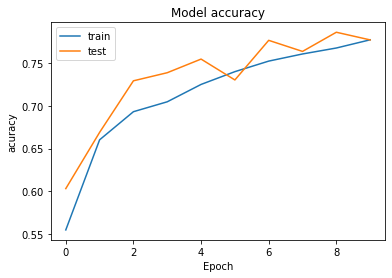

In [91]:
# plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('acuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [92]:
# Load the model

In [93]:
from tensorflow.keras.models import load_model
loaded_model=load_model('CNN_cat.h5')
print('Model Loaded Successfully')

Model Loaded Successfully


# real time prediction

In [94]:
### image preprocessing

In [98]:
from tensorflow.keras.preprocessing import image 
import numpy as np
test_image=image.load_img('C:/Users/lenovo/OneDrive/Pictures/cat2.jpg',target_size=(64,64))
test_image1=image.img_to_array(test_image)
test_image1=np.expand_dims(test_image,axis=0)

In [99]:
result= loaded_model.predict(test_image1)
print(result)

1/1 [==============================] - 0s 33ms/step
[[0.]]


In [100]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

In [105]:
if result==1:
    prediction="Dog"
    print(prediction)
else:
    prediction='cat'
    print(prediction)

cat


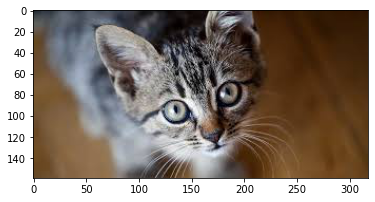

Model Prediction cat


In [106]:
image=imread('C:/Users/lenovo/OneDrive/Pictures/cat2.jpg')
plt.imshow(image)
plt.show()
print('Model Prediction',prediction)



In [107]:
print('evaluate model on test data')
result=loaded_model.evaluate(test_set)
print('test loss,test accuracy',result)

evaluate model on test data
63/63 [==============================] - 27s 435ms/step - loss: 0.4698 - accuracy: 0.7775
test loss,test accuracy [0.4697945713996887, 0.7774999737739563]


In [110]:
import pandas as pd
test_set.reset
prob=loaded_model.predict_generator(test_set)
print(prob)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5596\2258485694.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prob=loaded_model.predict_generator(test_set)


[[0.7068043 ]
 [0.13883363]
 [0.5033059 ]
 ...
 [0.7409217 ]
 [0.87585473]
 [0.05723276]]


In [112]:
df=pd.DataFrame({'filename':test_set.filenames,
                 'predict':prob[:,0],
                 'y':test_set.classes})



In [113]:
df

,filename,predict,y
0,cats\cat.4001.jpg,0.706804,0
1,cats\cat.4002.jpg,0.138834,0
2,cats\cat.4003.jpg,0.503306,0
3,cats\cat.4004.jpg,0.235807,0
4,cats\cat.4005.jpg,0.551402,0
...,...,...,...
1995,dogs\dog.4996.jpg,0.163077,1
1996,dogs\dog.4997.jpg,0.991023,1
1997,dogs\dog.4998.jpg,0.740922,1
1998,dogs\dog.4999.jpg,0.875855,1


In [118]:
pd.set_option('display.float_format',lambda x:'%.5f' %x)


df['y_pred']=df['predict']>0.5
df['y_pred']=df['y_pred'].astype(int)

In [119]:
df

,filename,predict,y,y_pred
0,cats\cat.4001.jpg,0.70680,0,1
1,cats\cat.4002.jpg,0.13883,0,0
2,cats\cat.4003.jpg,0.50331,0,1
3,cats\cat.4004.jpg,0.23581,0,0
4,cats\cat.4005.jpg,0.55140,0,1
...,...,...,...,...
1995,dogs\dog.4996.jpg,0.16308,1,0
1996,dogs\dog.4997.jpg,0.99102,1,1
1997,dogs\dog.4998.jpg,0.74092,1,1
1998,dogs\dog.4999.jpg,0.87585,1,1


In [132]:
df.y


0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: y, Length: 2000, dtype: int32

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
conf_matrix = confusion_matrix(df.y,df.y_pred)

In [140]:
print(conf_matrix)
print('Recall: %.3f' % recall_score(df.y, df.y_pred))
print('precision: %.3f' % precision_score(df.y, df.y_pred))

[[484 516]
 [475 525]]
Recall: 0.525
precision: 0.504


# print classification report

In [120]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=8364f29f768134fc425c7835adf3b708b1764e9960cbca1595283f66394e1e5f
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [142]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.




# transfer

In [143]:
import tensorflow as tf

In [144]:
Densenet_model=tf.keras.applications.DenseNet121(weights='imagenet',
                                                 input_shape=(64,64,3),
                                                    include_top=False)

29084464/29084464 [==============================] - 2s 0us/step


In [145]:
Densenet_model.trainable=False

In [146]:
Densenet_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [147]:
# ONLY convolution part is taken from the densenet 
# trainable=false 

In [148]:
from tensorflow.keras.layers import Dropout

In [149]:
# Create the architecture

model2=Sequential()

model2.add(Densenet_model)

# FCN
#FCN
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))

In [150]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               524416    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,562,049
Trainable params: 524,545
Non-trainable params: 7,037,504
_________________________________________________________________


In [151]:
# our cnn all arameter were trainable , 
# densenet is already trained , not going to train on our images 

In [152]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
history=model2.fit(training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 301s 1s/step - loss: 0.6086 - accuracy: 0.7511 - val_loss: 0.3649 - val_accuracy: 0.8325
Epoch 2/25
250/250 [==============================] - 212s 848ms/step - loss: 0.4305 - accuracy: 0.7972 - val_loss: 0.3421 - val_accuracy: 0.8480
Epoch 3/25
250/250 [==============================] - 211s 842ms/step - loss: 0.4094 - accuracy: 0.8073 - val_loss: 0.3381 - val_accuracy: 0.8475
Epoch 4/25
250/250 [==============================] - 212s 849ms/step - loss: 0.4045 - accuracy: 0.8108 - val_loss: 0.3171 - val_accuracy: 0.8620
Epoch 5/25
250/250 [==============================] - 235s 940ms/step - loss: 0.3849 - accuracy: 0.8174 - val_loss: 0.3120 - val_accuracy: 0.8575
Epoch 6/25
250/250 [==============================] - 228s 912ms/step - loss: 0.3799 - accuracy: 0.8248 - val_loss: 0.3092 - val_accuracy: 0.8585
Epoch 7/25
250/250 [==============================] - 245s 982ms/step - loss: 0.3756 - accuracy: 0.8210 - val_loss: 0.3165 - va

In [154]:
print("Evaluate on test data")
results=model2.evaluate(test_set)
print('test loss,test acc',results) 

Evaluate on test data
63/63 [==============================] - 32s 496ms/step - loss: 0.3135 - accuracy: 0.8610
test loss,test acc [0.3135429918766022, 0.8610000014305115]


# introduction 
ANN
ANN Kears, Hypar. Tuning
CNN - MNITST, Cat Dog Classification, Pre Trained models
Pytorch 